# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [93]:
%matplotlib notebook

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Outputs/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [95]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities_df = ({"City": cities, "Lat":lat_lngs})
#cities_df

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [96]:
#Base Url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

# set up lists to hold reponse info
citylist = []
lat = []
lng = []
temp = []
max_temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

#Counter for record processing
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()      
        lat_city = response["coord"]["lat"]
        lat.append(lat_city)
        temp_city = response["main"]["temp"]
        temp.append(temp_city)
        lng_city = response["coord"]["lon"]
        lng.append(lng_city)
        maxtemp_city = response["main"]["temp_max"]
        max_temp.append(maxtemp_city)
        hum_city = response["main"]["humidity"]
        humidity.append(hum_city)
        cloud_city = response["clouds"]["all"]
        cloud.append(cloud_city)
        wind_city = response["wind"]["speed"]
        wind.append(wind_city)
        country_city = response["sys"]["country"]
        country.append(country_city)
        date_city = response["dt"]
        date.append(date_city)
        citylist.append(city)
    #print(json.dumps(response, indent=4, sort_keys=True))
            
    except (KeyError, IndexError):
        print("City not found... skipping.")
    
    print(f"Processing record {counter}: {city}") 
    counter = counter + 1
    #print(f"The latitude for {city} is: {lat_city}")
    #print(f"The longitude for {city} is: {lng_city}")
    #print(f"The temperature for {city} is: {temp_city}")
    #print(f"The maximum temperature for {city} is: {maxtemp_city}")
    #print(f"The humidity for {city} is: {hum_city}")
    #print(f"The cloudiness for {city} is: {cloud_city}")
    #print(f"The wind for {city} is: {wind_city}")
    #print(f"{city} is in: {country_city}")
    #print(f"Weather information for {city} for: {date_city}")

City not found... skipping.
Processing record 1: mys shmidta
Processing record 2: hermanus
City not found... skipping.
Processing record 3: bolungarvik
Processing record 4: mar del plata
City not found... skipping.
Processing record 5: taolanaro
Processing record 6: saint-philippe
Processing record 7: lebu
Processing record 8: chokurdakh
Processing record 9: alyangula
Processing record 10: naze
Processing record 11: leningradskiy
Processing record 12: uaua
Processing record 13: usman
Processing record 14: el bagre
Processing record 15: san patricio
Processing record 16: mahebourg
Processing record 17: gari
Processing record 18: kapaa
Processing record 19: ewa beach
Processing record 20: urrao
Processing record 21: pevek
Processing record 22: nanortalik
Processing record 23: atuona
Processing record 24: methoni
City not found... skipping.
Processing record 25: saleaula
Processing record 26: avarua
Processing record 27: yulara
Processing record 28: vaini
Processing record 29: khatanga
Pr

Processing record 237: ouadda
Processing record 238: margate
Processing record 239: galle
Processing record 240: kenai
Processing record 241: pombas
Processing record 242: faya
Processing record 243: shache
Processing record 244: oktyabrskiy
City not found... skipping.
Processing record 245: linapacan
Processing record 246: lumberton
Processing record 247: huinan
City not found... skipping.
Processing record 248: amderma
Processing record 249: lhokseumawe
City not found... skipping.
Processing record 250: sorvag
Processing record 251: saldanha
Processing record 252: san pedro
Processing record 253: okha
Processing record 254: bengkulu
Processing record 255: george town
Processing record 256: marrakesh
Processing record 257: vila velha
Processing record 258: hasaki
Processing record 259: changde
Processing record 260: boa vista
Processing record 261: innisfail
Processing record 262: mana
Processing record 263: mbandaka
Processing record 264: sobolevo
Processing record 265: princeton
Pro

Processing record 476: petukhovo
Processing record 477: kamaishi
Processing record 478: rovaniemi
Processing record 479: qinzhou
Processing record 480: saint-augustin
Processing record 481: vardo
Processing record 482: muzhi
Processing record 483: alexandria
Processing record 484: beloha
Processing record 485: yar-sale
Processing record 486: tyumentsevo
Processing record 487: shitanjing
Processing record 488: irtyshskiy
Processing record 489: bohdan
Processing record 490: zabaykalsk
Processing record 491: urubicha
Processing record 492: ostrovnoy
Processing record 493: lorengau
Processing record 494: meulaboh
Processing record 495: harper
Processing record 496: shingu
Processing record 497: loa janan
Processing record 498: taonan
Processing record 499: dumaguete
Processing record 500: mosquera
Processing record 501: crotone
Processing record 502: pipar
Processing record 503: gonaives
Processing record 504: watrous
Processing record 505: mehamn
Processing record 506: savannah bight
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [97]:
#Create and Display the DataFrame
cities_df = pd.DataFrame({"City":citylist, "Lat": lat, "Lng" : lng, "Temp F": temp, "Max Temp F" : max_temp, 
                         "Humidity":humidity, "Cloudiness":cloud, "Wind Speed":wind, "Country":country, "Date": date})
cities_df

,City,Lat,Lng,Temp F,Max Temp F,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.42,19.23,59.00,59.00,80,14,1.01,ZA,1596062209
1,mar del plata,-38.00,-57.56,46.76,48.99,87,0,4.70,AR,1596062454
2,saint-philippe,-21.36,55.77,61.09,66.20,82,7,3.36,RE,1596062468
3,lebu,-37.62,-73.65,45.18,45.18,71,100,2.19,CL,1596062207
4,chokurdakh,70.63,147.92,45.43,45.43,63,75,9.55,RU,1596062165
...,...,...,...,...,...,...,...,...,...,...
582,maragogi,-9.01,-35.22,74.95,74.95,76,84,13.91,BR,1596063076
583,noumea,-22.28,166.46,78.35,80.60,57,55,13.87,NC,1596063076
584,abu samrah,35.30,37.18,79.70,79.70,31,0,4.90,SY,1596063076
585,phan thiet,10.93,108.10,77.94,77.94,88,100,8.81,VN,1596063077


In [98]:
#Export to.csv file
cities_df.to_csv("Outputs/CitiesNearEquator.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [99]:
humidity_over = cities_df.loc[cities_df['Humidity']>100]

In [100]:
#  Get the indices of cities that have humidity over 100%.
humidity_over

,City,Lat,Lng,Temp F,Max Temp F,Humidity,Cloudiness,Wind Speed,Country,Date


In [101]:
#  Get the indices of cities that have humidity over 100%.
# No city is over 100
cities_df["Humidity"].max()

100

In [102]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [103]:
# Extract relevant fields from the data frame
# Only keeping relvant columns for plotting excercises in this dataframe
# (City, Lat, Max. Temp, Humidity, Cloudiness and Wind Speed) 
city_data = cities_df[["City", "Lat", "Max Temp F", "Humidity","Cloudiness","Wind Speed"]]
city_data

,City,Lat,Max Temp F,Humidity,Cloudiness,Wind Speed
0,hermanus,-34.42,59.00,80,14,1.01
1,mar del plata,-38.00,48.99,87,0,4.70
2,saint-philippe,-21.36,66.20,82,7,3.36
3,lebu,-37.62,45.18,71,100,2.19
4,chokurdakh,70.63,45.43,63,75,9.55
...,...,...,...,...,...,...
582,maragogi,-9.01,74.95,76,84,13.91
583,noumea,-22.28,80.60,57,55,13.87
584,abu samrah,35.30,79.70,31,0,4.90
585,phan thiet,10.93,77.94,88,100,8.81


In [104]:
# Export the City_Data into a csv
cities_df.to_csv("Outputs/City_Data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


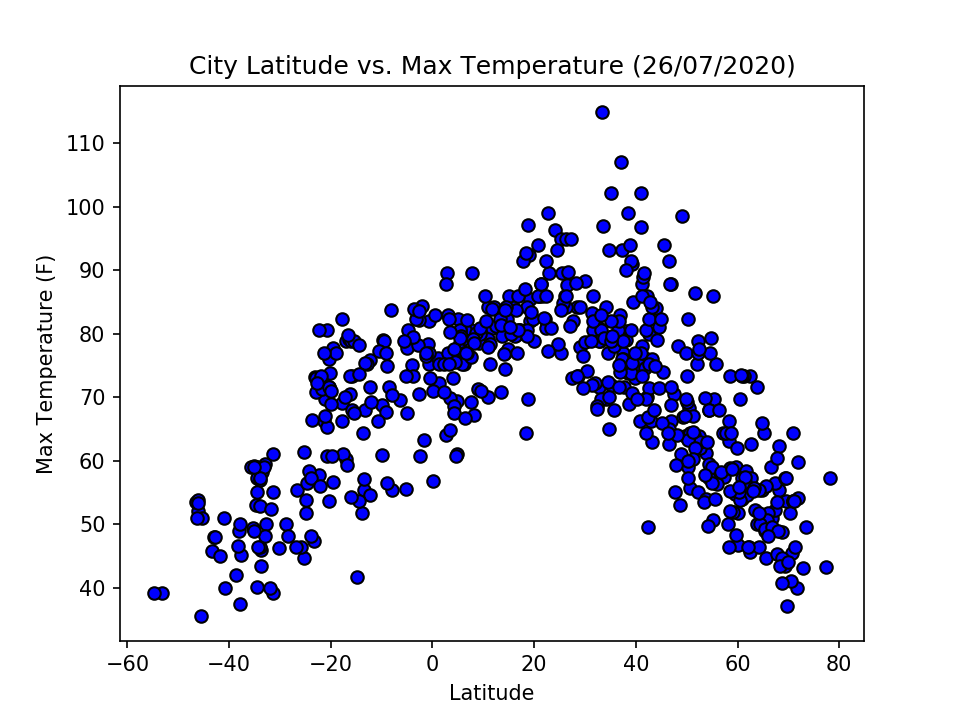

In [105]:
plt.figure()
plt.scatter(city_data["Lat"], city_data["Max Temp F"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (26/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Outputs/MaxTemp.png")

In [106]:
# Latitude vs. Temperature Plot Explanation
# We are comparing the maximum temperature in cites have based on their geographical location (North, Equator or South Hemisphere)
# Cities that are more to the south (Lat -60) or north (Lat 80) usually have lower max temperatures during the year. 
# As cities approach the equator (Lat 0) the maximum tempretures increases meaning there are usually warmer cities. 

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


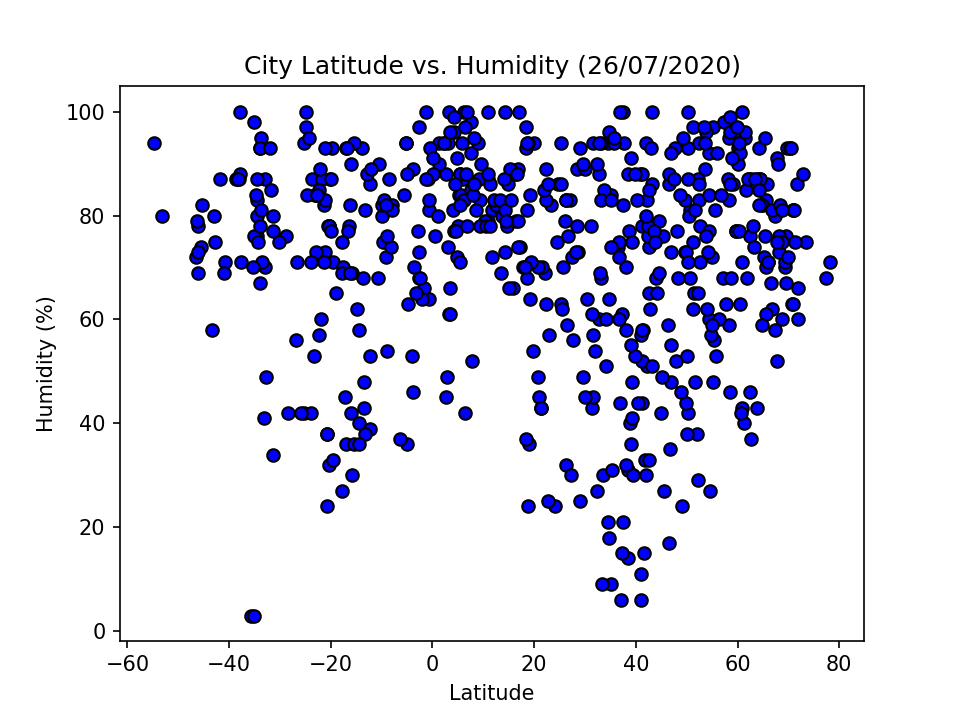

In [107]:
plt.figure()
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (26/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Outputs/Humidity.png")

In [108]:
# Latitude vs. Humidity Plot Explanation
# We are comparing the humidity (%) in cites have based on their geographical location (North, Equator or South Hemisphere)
# There is not a clear understing if cities in the south, equator or north have higher % of humidity. 
# This might be because humidity is not only influenced by lat,lng but also if there is sea or other water bodies neraby the city. 

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


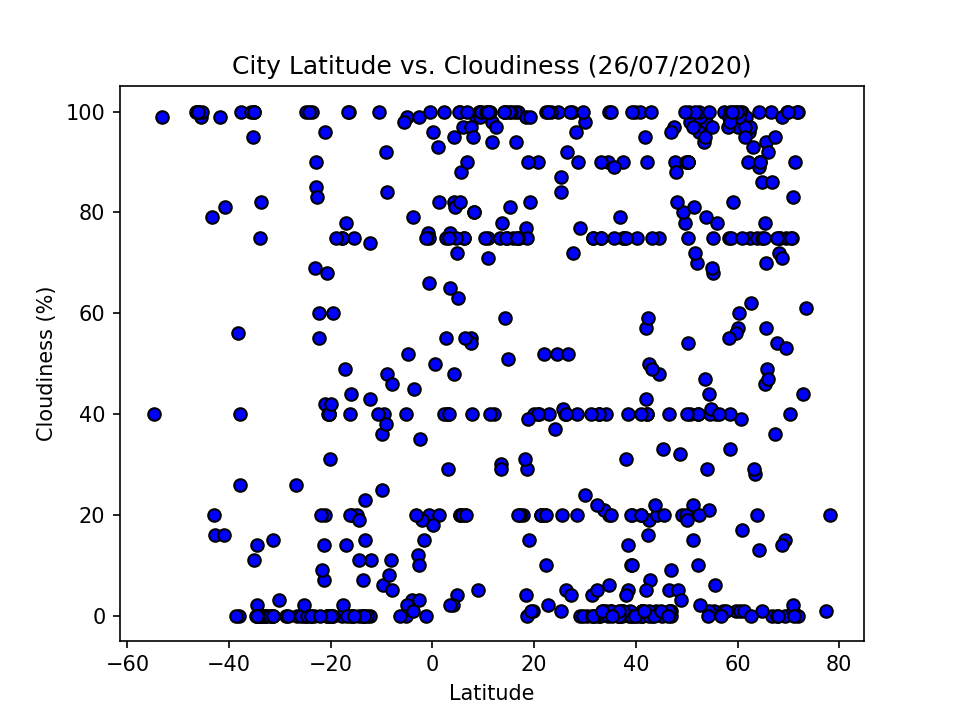

In [109]:
plt.figure()
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (26/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Outputs/Cloud.png")

In [110]:
# Latitude vs. Cloudiness Plot Explanation
# We are comparing the cloud (%) in cites have based on their geographical location (North, Equator or South Hemisphere)
# There is not a clear understanding if cities in the south, equator or north have higher % of clouds. 
# Yet, there are some clusters detected in cities from the equator towards the north with higher % of clouds.

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


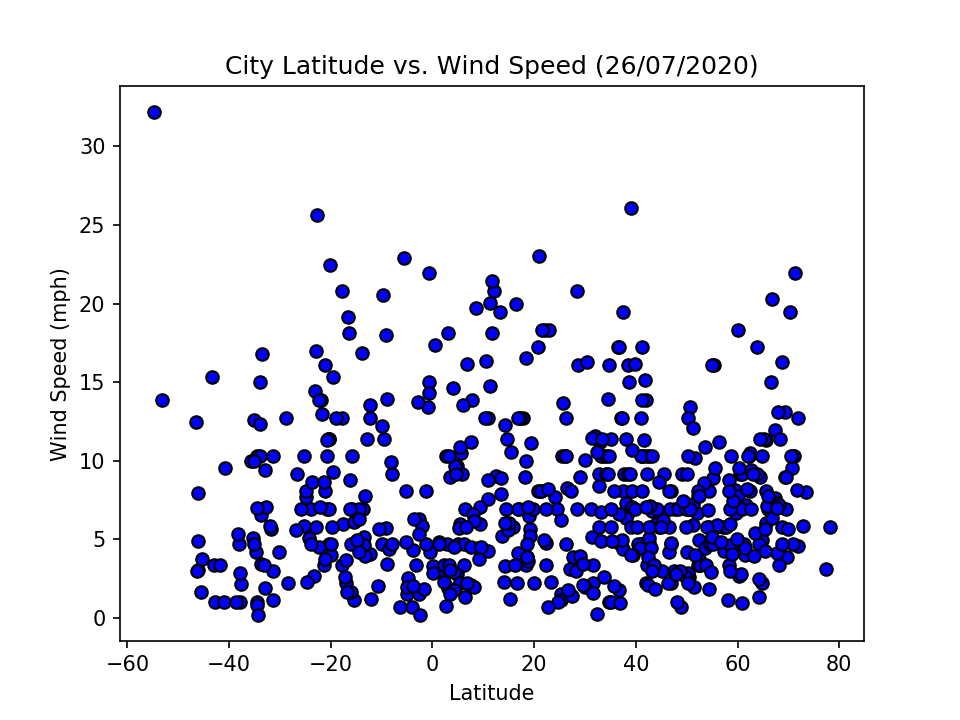

In [111]:
plt.figure()
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (26/07/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Outputs/Wind.png")

In [112]:
# Latitude vs. Wind Speed Plot Explanation
# We are comparing the Wind Speed (mph) in cites have based on their geographical location (North, Equator or South Hemisphere)
# There is not a clear understanding if cities in the south, equator or north have higher wind speeds. 
# Interestingly, there seems to be outliers in the three regions: south, equator and the north.

## Linear Regression

In [113]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere
north = city_data.loc[city_data['Lat']>=0]
north

,City,Lat,Max Temp F,Humidity,Cloudiness,Wind Speed
4,chokurdakh,70.63,45.43,63,75,9.55
6,naze,28.37,84.20,89,20,6.93
7,leningradskiy,69.38,43.41,70,15,13.09
9,usman,52.05,75.20,38,70,6.71
10,el bagre,7.59,80.56,92,55,2.10
...,...,...,...,...,...,...
580,alberton,46.82,68.83,92,96,4.74
581,adjumani,3.38,64.87,96,2,1.54
584,abu samrah,35.30,79.70,31,0,4.90
585,phan thiet,10.93,77.94,88,100,8.81


In [114]:
#Southern Hemisphere
south = city_data.loc[city_data['Lat']<=0]
south

,City,Lat,Max Temp F,Humidity,Cloudiness,Wind Speed
0,hermanus,-34.42,59.00,80,14,1.01
1,mar del plata,-38.00,48.99,87,0,4.70
2,saint-philippe,-21.36,66.20,82,7,3.36
3,lebu,-37.62,45.18,71,100,2.19
5,alyangula,-13.85,51.80,93,0,16.89
...,...,...,...,...,...,...
572,kabare,-2.47,60.73,68,35,0.16
573,paracatu,-17.22,69.96,45,49,2.62
577,balikpapan,-1.27,77.00,100,75,8.05
582,maragogi,-9.01,74.95,76,84,13.91


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


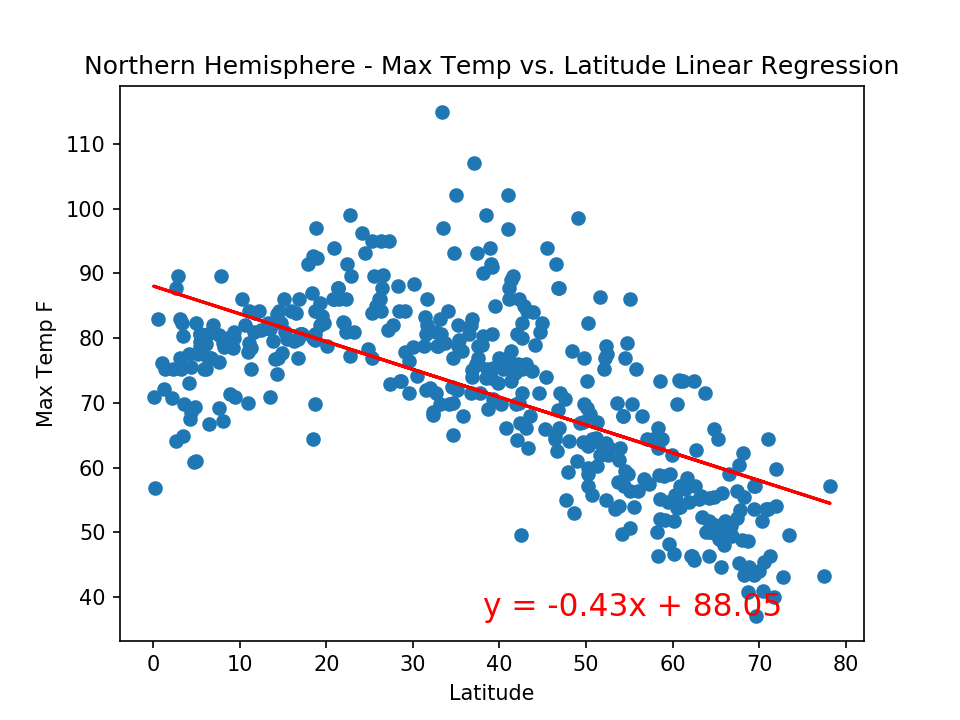

The r-squared is: 0.4169781760800875


In [115]:
plt.figure()

#Define variables and names
x_value = north["Lat"]
y_value = north["Max Temp F"]
x_label = "Latitude"
y_label = "Max Temp F"
graph_title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/MaxTempN_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


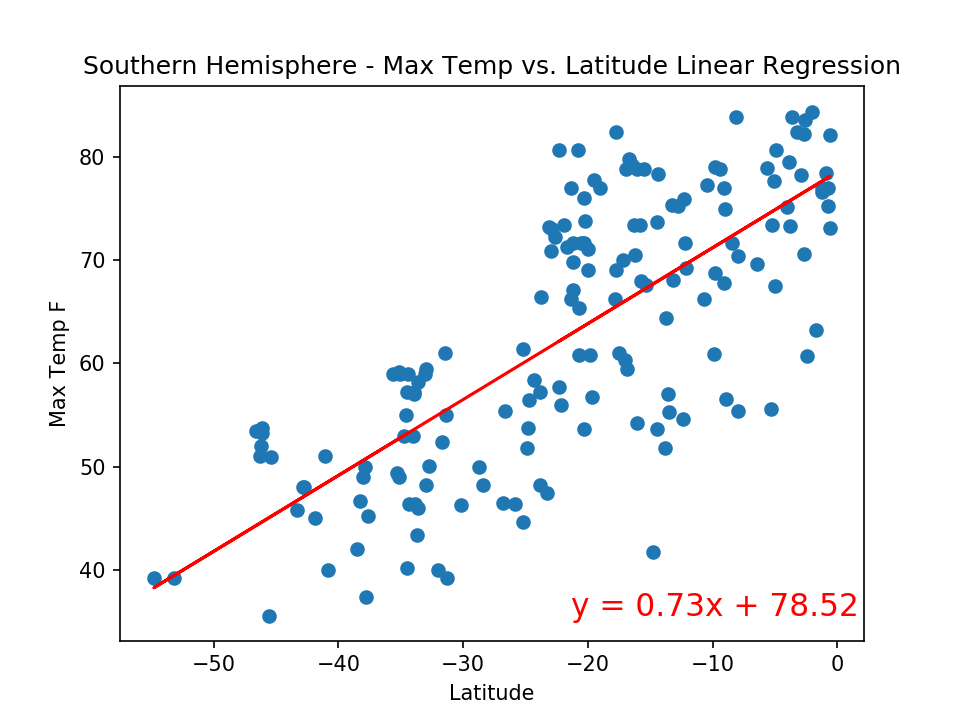

The r-squared is: 0.5520661226617505


In [116]:
plt.figure()

#Define variables and names
x_value = south["Lat"]
y_value = south["Max Temp F"]
x_label = "Latitude"
y_label = "Max Temp F"
graph_title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/MaxTempS_Regression.png")

In [126]:
# For all regressions, there are quite more cities analyzed in the northern hemipshere than in the southern hemisphere

#Regression for Max Temperature by Hemisphere
#In the northern hemishphere further north (Latitude increases), the Max Temp decreases meaning the colder it is, whereas...
#In South Hemishere furhter south (more negative) its also colder, but as it moves to the north, approaching the equator, the warmer it is

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


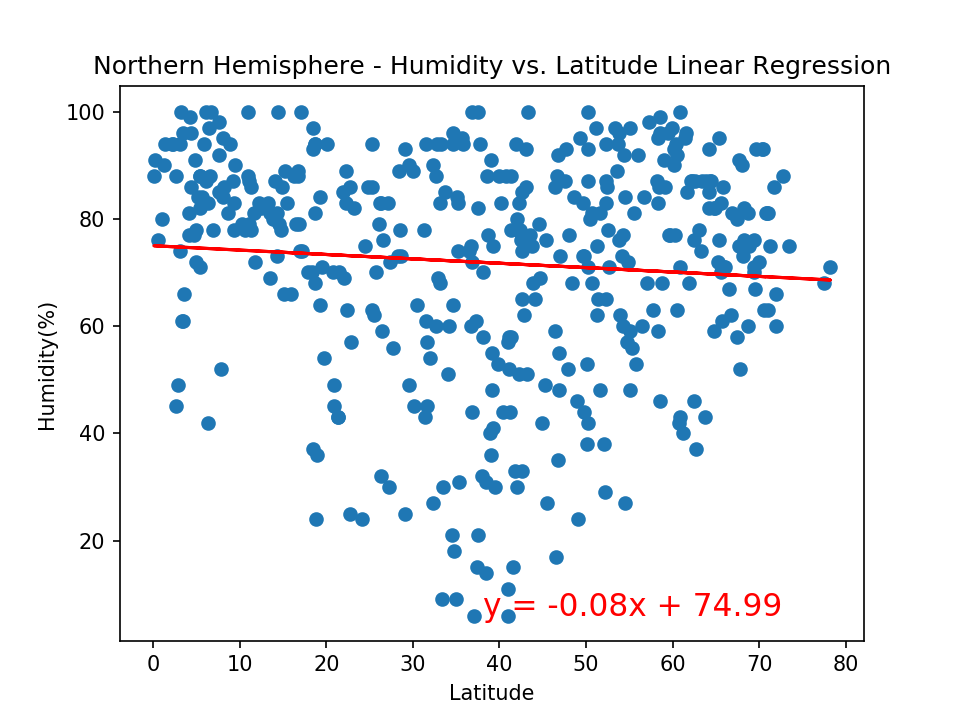

The r-squared is: 0.006585571945409859


In [117]:
plt.figure()

#Define variables and names
x_value = north["Lat"]
y_value = north["Humidity"]
x_label = "Latitude"
y_label = "Humidity(%)"
graph_title = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/HumidityN_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


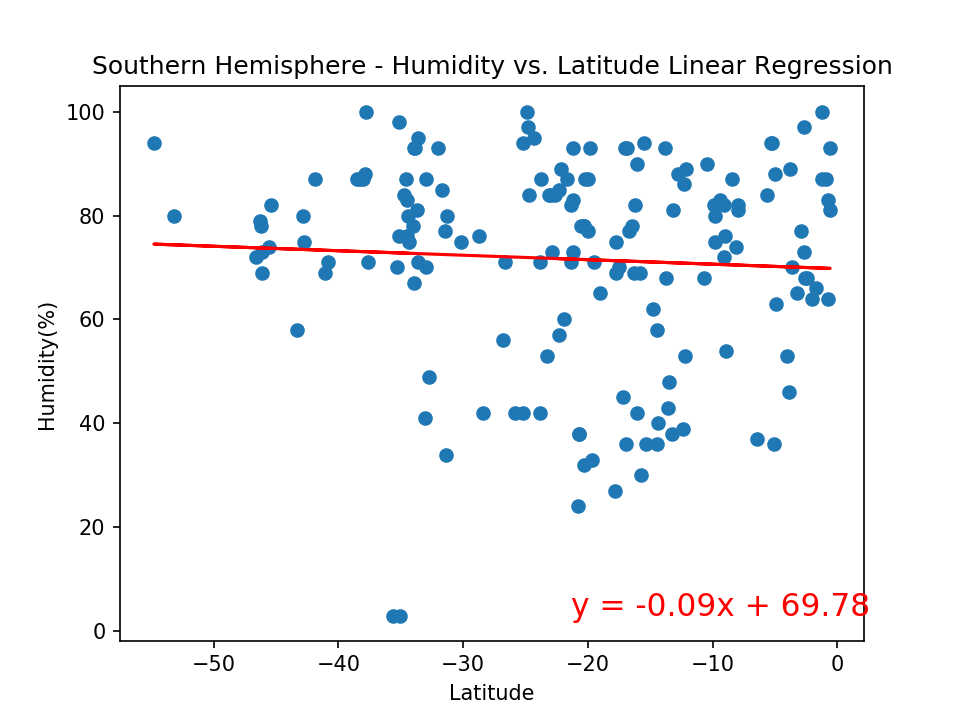

The r-squared is: 0.00316066854641208


In [118]:
plt.figure()

#Define variables and names
x_value = south["Lat"]
y_value = south["Humidity"]
x_label = "Latitude"
y_label = "Humidity(%)"
graph_title = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/HumidityS_Regression.png")

In [ ]:
#Regression for Humidity per Hemishphere
#For both regressions, the slope is near zero, determining that the Latitude is not an important factor to predict humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


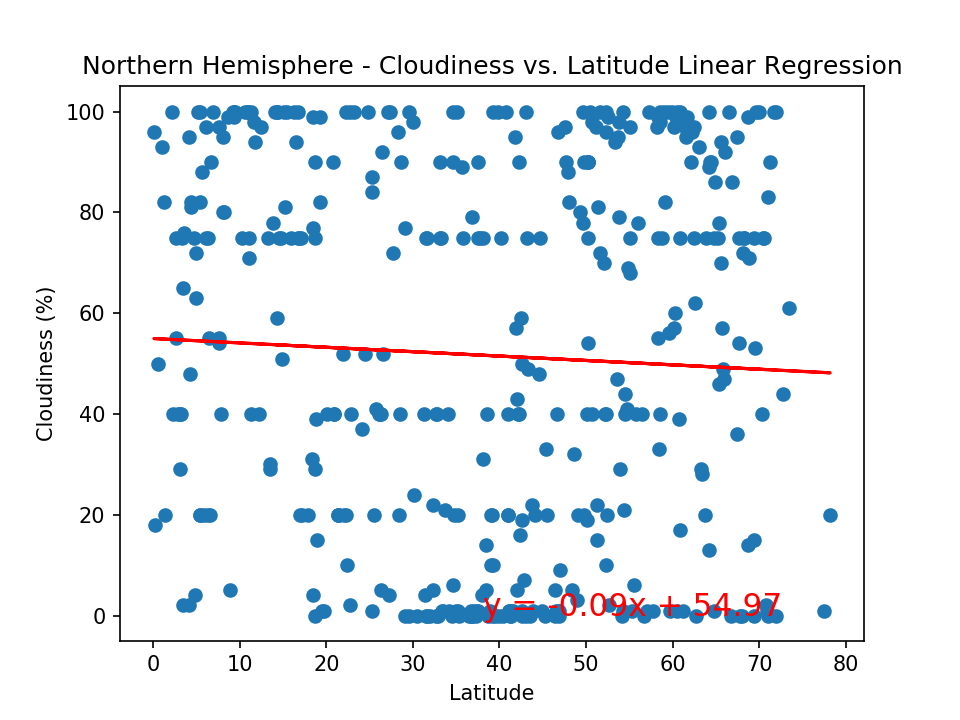

The r-squared is: 0.0023245926288945123


In [119]:
plt.figure()

#Define variables and names
x_value = north["Lat"]
y_value = north["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
graph_title = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/CloudN_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


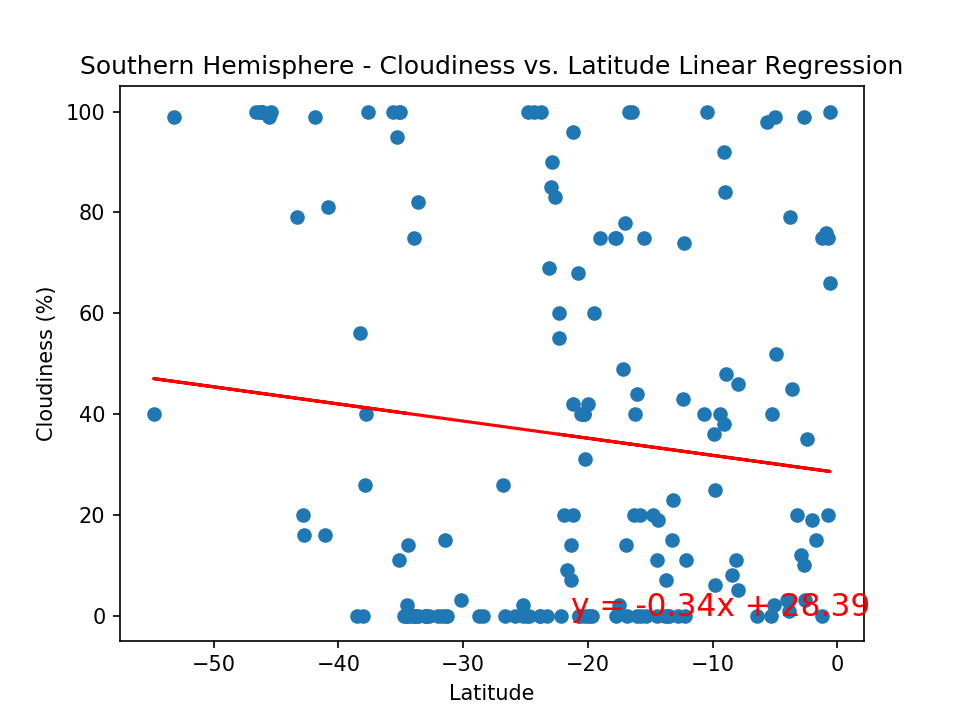

The r-squared is: 0.013664569590712388


In [120]:
plt.figure()

#Define variables and names
x_value = south["Lat"]
y_value = south["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness (%)"
graph_title = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/CloudS_Regression.png")

In [ ]:
#Regression for Cloudiness per Hemishphere
#For Norhthern regressions, the slope is near zero, determining that the Latitude is not an important factor to predict cloudiness
# For the Southern regression, the slope is a bit higher, but still it seems there is not a clear relationship
# This pattern is similar to cloudiness, probably as clouds and humidity might be correlated 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


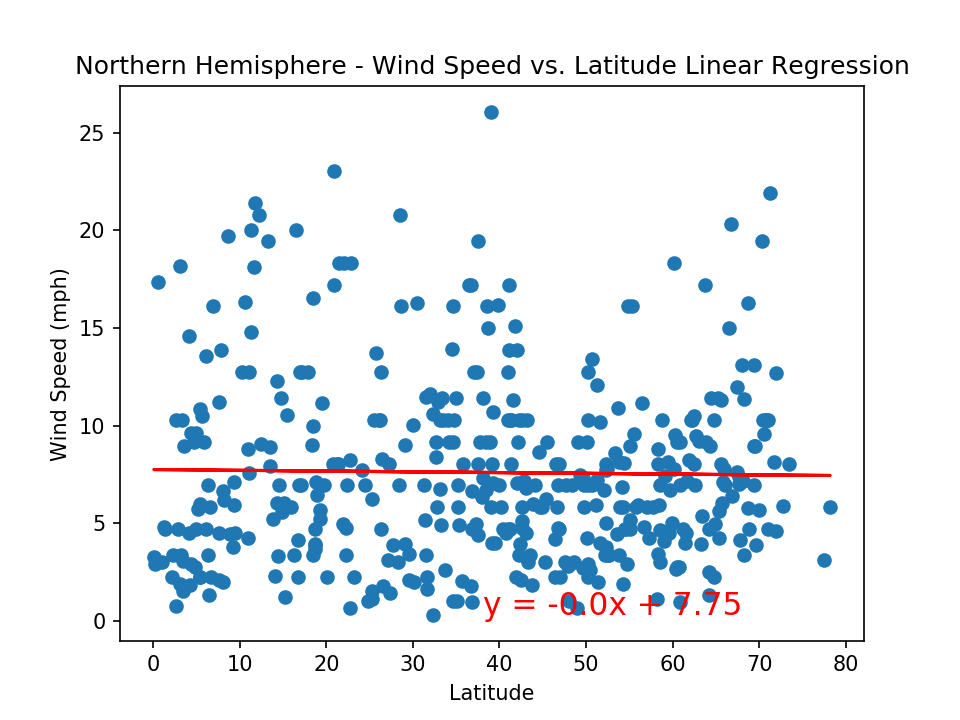

The r-squared is: 0.0002961975439735878


In [121]:
plt.figure()

#Define variables and names
x_value = north["Lat"]
y_value = north["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
graph_title = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/WindN_Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


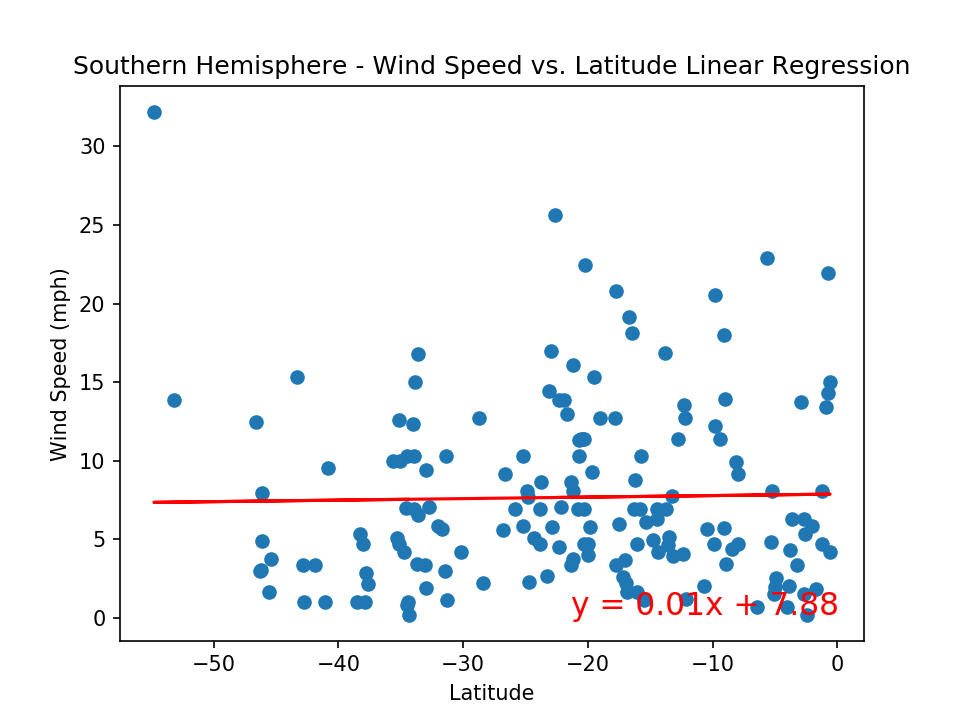

The r-squared is: 0.00048311519551627006


In [122]:
plt.figure()

#Define variables and names
x_value = south["Lat"]
y_value = south["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed (mph)"
graph_title = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
 
#Regresssion Runs    
x_values = x_value
y_values = y_value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_value.mean(),y_value.min()),fontsize=15,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(graph_title)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig("Outputs/WindS_Regression.jpg")

In [125]:
#Regression for Wind Speed per Hemishphere
#For Northern Hemisphere the slope is zero and for the southern almost zero (.01)
#Latitude is not a good predictor for wind speed